In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from mk_arrays import create_arr

In [2]:
# import arrays
tube = readsav('/Users/WilliamHenryAshfieldIV/spring2020/dat/f4.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/spring2020/dat/f4_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/spring2020/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [3]:
# arrs = create_arr(tube,frac,log10T,log10G,time=20)
# x = arrs['x']
# v = arrs['v']
# T = arrs['T']
# ne = arrs['ne']
# wav = arrs['wav']
# spec = arrs['spec']
# EM = arrs['EM']

In [4]:
from matplotlib import animation, rc
from IPython.display import HTML

Text(0, 0.5, 'vel [Mm/s]')

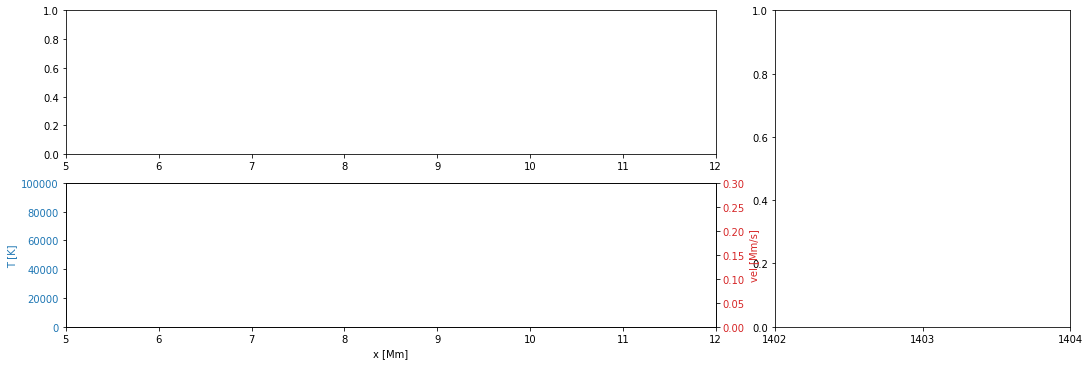

In [5]:
fig = plt.figure(figsize=(18,9))
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (2, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

ax1.set_xlim(5,12)

ax2.set_xlim(5,12)
ax2.set_ylim(0,1e5)
ax2.set_xlabel('x [Mm]')
ax2.set_ylabel('T [K]', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3.set_xlim(1402,1404)
ax3.set_xticks(np.arange(1402, 1405, 1))

ax4 = ax2.twinx()
ax4.tick_params(axis='y', labelcolor='tab:red')
ax4.set_ylim(0,0.3)
ax4.set_ylabel('vel [Mm/s]', color='tab:red')  # we already handled the x-label with ax1

In [6]:
# data placeholders
x,v,T,ne,wav,spec,EM = np.zeros(0),np.zeros(0),np.zeros(0),np.zeros(0),np.zeros(0),np.zeros(0),np.zeros(0)

In [7]:
plot11, = ax1.plot(x,ne**2,label='ne^2')
plot12, = ax1.plot(x,EM,label='EM')
ax1.legend()

plot21, = ax2.plot(x,T*1e6,color='tab:blue')

plot3, = ax3.plot(wav,spec)

plot22, = ax4.plot(x, v, color='tab:red')

In [36]:
def update(i):
    global x
    global v
    global T
    global ne
    global wav
    global spec
    global EM
    
   
    
    arrs = create_arr(tube,frac,log10T,log10G,time=i)
    x = arrs['x']
    v = arrs['v']
    T = arrs['T']
    ne = arrs['ne']
    wav = arrs['wav']
    spec = arrs['spec']
    EM = arrs['EM']

    EM /= np.max(EM)
    ne /= np.max(ne)
    
    spec[(spec >= 1402) & (spec <= 1404)]
    wav[(spec >= 1402) & (spec <= 1404)]
    
    plot11.set_data(x,ne**2)
    plot12.set_data(x,EM)
    plot21.set_data(x,T*1e6)
    plot22.set_data(x,v)
    plot3.set_data(wav,spec)
    
    plot3.axes.set_ylim(0,np.max(spec)+0.05*np.max(spec))


    #     if x >= xmax-1.00:
    #         p011.axes.set_xlim(x-xmax+1.0,x+1.0)
    #         p021.axes.set_xlim(x-xmax+1.0,x+1.0)
    #         p031.axes.set_xlim(x-xmax+1.0,x+1.0)
    #         p032.axes.set_xlim(x-xmax+1.0,x+1.0)

    return plot11,plot12,plot21,plot22,plot3

In [40]:
simulation = animation.FuncAnimation(fig, update, blit=False, frames=500, interval=20, repeat=False)

In [34]:
plt.show()

In [41]:
simulation.save(filename='three_plt.mp4',fps=2,dpi=300)

/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/mk_arrays.py:98: RuntimeWarning: invalid value encountered in true_divide
  factor = nei/eqi
/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/mk_arrays.py:98: RuntimeWarning: divide by zero encountered in true_divide
  factor = nei/eqi
/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/mk_arrays.py:144: RuntimeWarning: overflow encountered in double_scalars
  emissNEI[i,:] = photo_fac*EM[i]*factor[i]*10**g[i]/np.sqrt(2*np.pi)/sig[i]*np.exp(-(ll-line-line*v[i]/c)**2/(2*sig[i]**2))
/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/mk_arrays.py:144: RuntimeWarning: invalid value encountered in double_scalars
  emissNEI[i,:] = photo_fac*EM[i]*factor[i]*10**g[i]/np.sqrt(2*np.pi)/sig[i]*np.exp(-(ll-line-line*v[i]/c)**2/(2*sig[i]**2))
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expandin

In [38]:
HTML(simulation.to_html5_video())

/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/mk_arrays.py:98: RuntimeWarning: invalid value encountered in true_divide
  factor = nei/eqi
/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/mk_arrays.py:98: RuntimeWarning: divide by zero encountered in true_divide
  factor = nei/eqi
/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/mk_arrays.py:144: RuntimeWarning: overflow encountered in double_scalars
  emissNEI[i,:] = photo_fac*EM[i]*factor[i]*10**g[i]/np.sqrt(2*np.pi)/sig[i]*np.exp(-(ll-line-line*v[i]/c)**2/(2*sig[i]**2))
/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/mk_arrays.py:144: RuntimeWarning: invalid value encountered in double_scalars
  emissNEI[i,:] = photo_fac*EM[i]*factor[i]*10**g[i]/np.sqrt(2*np.pi)/sig[i]*np.exp(-(ll-line-line*v[i]/c)**2/(2*sig[i]**2))
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expandin